In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
data = pd.read_csv(url)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(772, 31)

In [6]:
data['Class'].value_counts()

,count
Class,
0,763
1,9


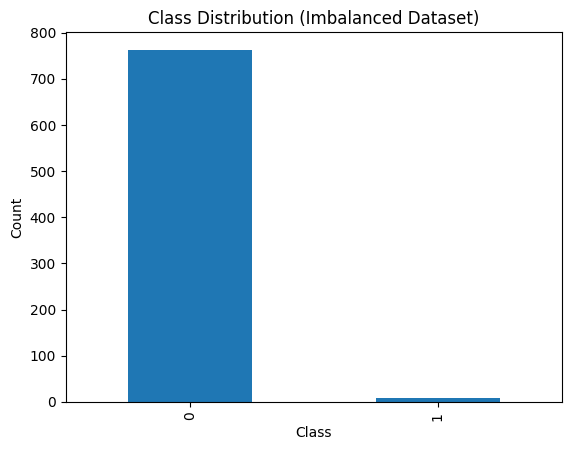

In [7]:
import matplotlib.pyplot as plt

data['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Imbalanced Dataset)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

X.shape, y.shape


((772, 30), (772,))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, #30% of the data for testing & 70% for training
    random_state=42,
    stratify=y
)
X_train.shape, X_test.shape


((540, 30), (232, 30))

In [11]:
print("Training set:")
print(y_train.value_counts())

print("\nTesting set:")
print(y_test.value_counts())

Training set:
Class
0    534
1      6
Name: count, dtype: int64

Testing set:
Class
0    229
1      3
Name: count, dtype: int64


In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_train, y_train)
y_balanced.value_counts()



,count
Class,
0,534
1,534


In [14]:
#Sampling Technique 1

balanced_data = X_balanced.copy()
balanced_data['Class'] = y_balanced

sample_random = balanced_data.sample(frac=0.8, random_state=42)

X_srs = sample_random.drop('Class', axis=1)
y_srs = sample_random['Class']

y_srs.value_counts()


,count
Class,
0,440
1,414


In [15]:
#SAMPLING TECHNIQUE 2

k = 2
sample_systematic = balanced_data.iloc[::k]
X_sys = sample_systematic.drop('Class', axis=1)
y_sys = sample_systematic['Class']
y_sys.value_counts()


,count
Class,
0,268
1,266


In [16]:
#SAMPLING TECHNIQUE 3

sample_bootstrap = balanced_data.sample(
    n=len(balanced_data),
    replace=True,
    random_state=42
)

X_boot = sample_bootstrap.drop('Class', axis=1)
y_boot = sample_bootstrap['Class']

y_boot.value_counts()


,count
Class,
1,574
0,494


In [17]:
#SAMPLING TECHNIQUE 4

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, _ in kf.split(balanced_data):
    sample_cv = balanced_data.iloc[train_index]
    break

X_cv = sample_cv.drop('Class', axis=1)
y_cv = sample_cv['Class']

y_cv.value_counts()


,count
Class,
1,433
0,421


In [18]:
#SAMPLING TECHNIQUE 5

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, _ in sss.split(X_balanced, y_balanced):
    X_strat = X_balanced.iloc[train_index]
    y_strat = y_balanced.iloc[train_index]

y_strat.value_counts()


,count
Class,
1,427
0,427


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [26]:
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(random_state=42),
    "M3_RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "M4_SVM": SVC(),
    "M5_KNN": KNeighborsClassifier()
}

In [27]:
from sklearn.metrics import accuracy_score
import pandas as pd

In [28]:
datasets = {
    "Sampling1_SimpleRandom": (X_srs, y_srs),
    "Sampling2_Systematic": (X_sys, y_sys),
    "Sampling3_Bootstrap": (X_boot, y_boot),
    "Sampling4_CrossValidation": (X_cv, y_cv),
    "Sampling5_Stratified": (X_strat, y_strat)
}


In [29]:
results = pd.DataFrame(
    index=models.keys(),
    columns=datasets.keys()
)

In [30]:
for model_name, model in models.items():
    for sampling_name, (X_sample, y_sample) in datasets.items():

        # Train the model on sampled training data
        model.fit(X_sample, y_sample)

        # Predict using the SAME test data
        y_pred = model.predict(X_test)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)

        # Store accuracy in percentage
        results.loc[model_name, sampling_name] = round(acc * 100, 2)

results


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Sampling1_SimpleRandom,Sampling2_Systematic,Sampling3_Bootstrap,Sampling4_CrossValidation,Sampling5_Stratified
M1_LogisticRegression,90.95,87.5,91.38,92.24,89.22
M2_DecisionTree,96.12,96.55,96.98,96.98,98.28
M3_RandomForest,99.14,99.14,99.14,99.14,99.14
M4_SVM,86.64,84.91,62.93,85.34,86.21
M5_KNN,96.55,94.4,97.84,97.41,96.98


In [31]:
results.to_csv("sampling_results_new_methods.csv")

In [33]:
from google.colab import files
files.download("sampling_results_new_methods.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>